# TensorFlow2教程-CNN-RNN结构用于图像处理

## 1.导入数据
使用cifar-10数据集
![](https://image.slidesharecdn.com/pycon2015-150913033231-lva1-app6892/95/pycon-2015-48-638.jpg?cb=1442115225)

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow import keras



In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [4]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(50000, 32, 32, 3)   (50000, 10)
(10000, 32, 32, 3)   (10000, 10)


## 2.简单的cnn-rnn结构

In [5]:
from tensorflow.keras import layers
model = keras.Sequential()

In [6]:
x_shape = x_train.shape
model.add(layers.Conv2D(input_shape=(x_shape[1], x_shape[2], x_shape[3]),
                       filters=32, kernel_size=(3,3), strides=(1,1), 
                       padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [7]:
print(model.output_shape)

(None, 16, 16, 32)


In [8]:
model.add(layers.Reshape(target_shape=(16*16, 32)))
model.add(layers.LSTM(50, return_sequences=False))

model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 32)           0         
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 50)                16600     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 18,006
Trainable params: 18,006
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%time
history = model.fit(x_train, y_train, batch_size=32,epochs=5, validation_split=0.1)


Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 139s 3ms/sample - loss: 2.1328 - accuracy: 0.2132 - val_loss: 2.0399 - val_accuracy: 0.2386
Epoch 2/5
45000/45000 [==============================] - 145s 3ms/sample - loss: 1.9657 - accuracy: 0.2684 - val_loss: 1.8785 - val_accuracy: 0.3004
Epoch 3/5
45000/45000 [==============================] - 146s 3ms/sample - loss: 1.8475 - accuracy: 0.3048 - val_loss: 1.7853 - val_accuracy: 0.3290
Epoch 4/5
45000/45000 [==============================] - 135s 3ms/sample - loss: 1.7433 - accuracy: 0.3447 - val_loss: 1.7078 - val_accuracy: 0.3520
Epoch 5/5
45000/45000 [==============================] - 137s 3ms/sample - loss: 1.6751 - accuracy: 0.3693 - val_loss: 1.6920 - val_accuracy: 0.3664
CPU times: user 28min 48s, sys: 1min 28s, total: 30min 16s
Wall time: 11min 41s


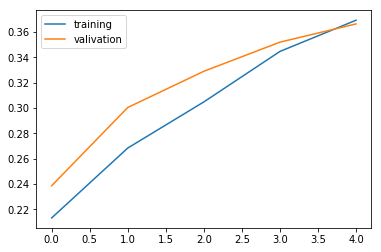

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [12]:
res = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 603us/sample - loss: 1.7132 - accuracy: 0.3590


## CNN和LSTM结果合并

In [13]:
x_shape = x_train.shape
inn = layers.Input(shape=(x_shape[1], x_shape[2], x_shape[3]))
conv = layers.Conv2D(filters=32,kernel_size=(3,3), strides=(1,1),
                    padding='same', activation='relu')(inn)
pool = layers.MaxPool2D(pool_size=(2,2), padding='same')(conv)
flat = layers.Flatten()(pool)
dense1 = layers.Dense(64)(flat)

In [14]:
reshape = layers.Reshape(target_shape=(x_shape[1]*x_shape[2], x_shape[3]))(inn)
lstm_layer = layers.LSTM(32, return_sequences=False)(reshape)
dense2 = layers.Dense(64)(lstm_layer)


In [18]:
merged_layer = layers.concatenate([dense1, dense2])
outt = layers.Dense(10,activation='softmax')(merged_layer)
model = keras.Model(inputs=inn, outputs=outt)
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1024, 3)      0           input_1[0][0]                    
____________________________________________________________________________________________

In [19]:
%%time
history2 = model.fit(x_train, y_train, batch_size=64,epochs=5, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 679s 15ms/sample - loss: 11.2904 - accuracy: 0.3047 - val_loss: 1.8392 - val_accuracy: 0.3776
Epoch 2/5
45000/45000 [==============================] - 642s 14ms/sample - loss: 1.7014 - accuracy: 0.4163 - val_loss: 1.7302 - val_accuracy: 0.4252
Epoch 3/5
45000/45000 [==============================] - 574s 13ms/sample - loss: 1.5295 - accuracy: 0.4751 - val_loss: 1.6444 - val_accuracy: 0.4626
Epoch 4/5
45000/45000 [==============================] - 623s 14ms/sample - loss: 1.4177 - accuracy: 0.5120 - val_loss: 1.6575 - val_accuracy: 0.4666
Epoch 5/5
45000/45000 [==============================] - 611s 14ms/sample - loss: 1.3566 - accuracy: 0.5345 - val_loss: 1.6687 - val_accuracy: 0.4760
CPU times: user 1h 42min 35s, sys: 4min 12s, total: 1h 46min 47s
Wall time: 52min 10s


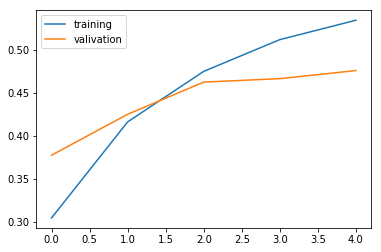

In [21]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()